In [88]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import datetime
import seaborn as sns
import statsmodels.api as sm 
from statsmodels import regression
from scipy import stats
from scipy.stats import ttest_ind
%matplotlib inline

yf.pdr_override()

start_i = '2017-01-01'

bova11 = yf.download('BOVA11.SA', start=start_i, parse_dates=True)
vale3 = yf.download('VALE3.SA', start=start_i, parse_dates=True)
b3sa3 = yf.download('B3SA3.SA', start=start_i, parse_dates=True)
itub4 = yf.download('ITUB4.SA', start=start_i, parse_dates=True)
petr4 = yf.download('PETR4.SA', start=start_i, parse_dates=True)
bbdc4 = yf.download('BBDC4.SA', start=start_i, parse_dates=True)
petr3 = yf.download('PETR3.SA', start=start_i, parse_dates=True)
abev3 = yf.download('ABEV3.SA', start=start_i, parse_dates=True)
mglu3 = yf.download('MGLU3.SA', start=start_i, parse_dates=True)
bbsa3 = yf.download('BBAS3.SA', start=start_i, parse_dates=True)
itsa4 = yf.download('ITSA4.SA', start=start_i, parse_dates=True)

tickers_dict =[bova11, vale3, b3sa3, itub4, petr4,
               bbdc4, petr3, abev3, mglu3, bbsa3, itsa4]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [89]:
bova11.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-17,97.419998,99.250000,97.419998,99.129997,99.129997,5621400
2020-07-20,99.120003,100.599998,98.879997,100.500000,100.500000,8563550
2020-07-21,101.230003,101.360001,99.849998,100.290001,100.290001,5261760
2020-07-22,100.570000,101.150002,99.389999,100.379997,100.379997,6524500
2020-07-23,100.379997,101.059998,98.269997,98.400002,98.400002,7849280
2020-07-24,98.300003,98.930000,97.089996,98.589996,98.589996,9457090
2020-07-27,98.930000,100.730003,98.849998,100.620003,100.620003,7329950
2020-07-28,100.250000,100.800003,99.610001,100.309998,100.309998,5688120
2020-07-29,100.930000,101.769997,100.860001,101.500000,101.500000,6179820


- iShares Ibovespa Fundo de Índice (BOVA11)

- (1) - VALE3 (10.26%)
- (2) - B3SA3 (7.11%)
- (3) - ITUB4 (6.67%)

- = 24.04 % (24/07/2020)



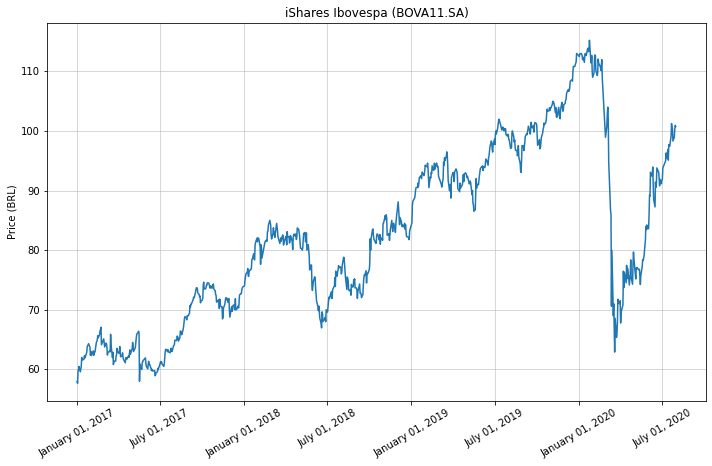

In [90]:
# Plotting iShares Ibovespa (BOVA11.SA): 

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

plt.plot(bova11.index, bova11.Open, linestyle='-')

plt.ylabel('Price (BRL)')
plt.title('iShares Ibovespa (BOVA11.SA)')

plt.grid(linewidth=0.5)
plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.show()

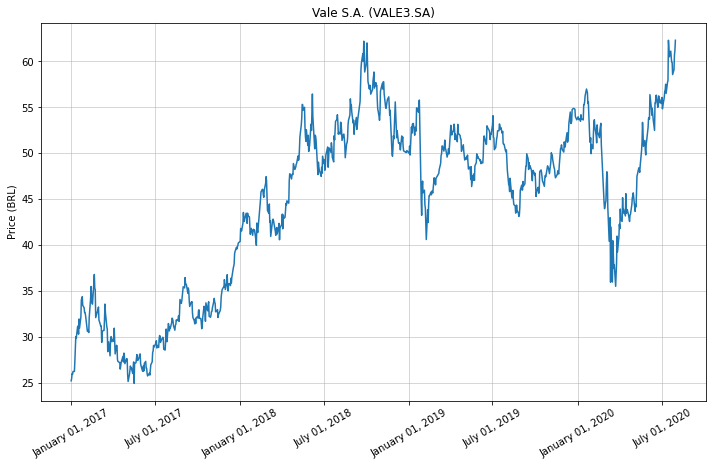

In [91]:
# Plotting Vale S.A. (VALE3.SA):

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

plt.plot(vale3.index, vale3.Open, linestyle='-')
plt.title('Vale S.A. (VALE3.SA)')
plt.ylabel('Price (BRL)')

plt.grid(linewidth=0.5)
plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.show()

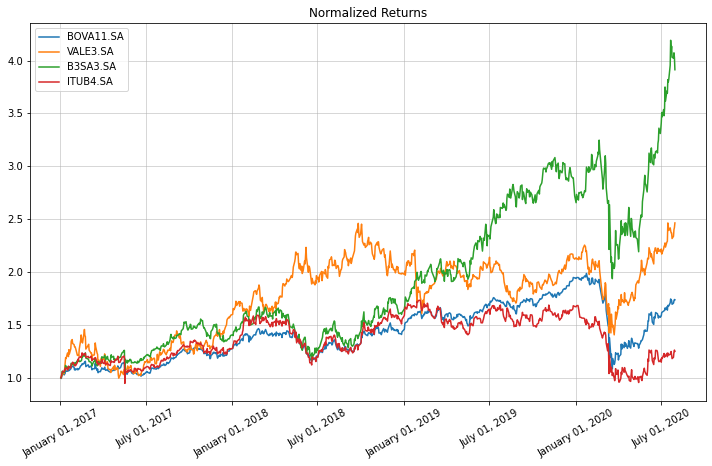

In [92]:
# Normalized comparison

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

plt.plot(bova11.index, bova11.Open/bova11.Open[0], label='BOVA11.SA', linestyle='-')
plt.plot(vale3.index, vale3.Open/vale3.Open[0], label='VALE3.SA', linestyle='-')
plt.plot(b3sa3.index, b3sa3.Open/b3sa3.Open[0], label='B3SA3.SA', linestyle='-')
plt.plot(itub4.index, itub4.Open/itub4.Open[0], label='ITUB4.SA', linestyle='-')

plt.title('Normalized Returns')

plt.grid(linewidth=0.5)
plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.legend()
plt.show()

In [93]:
# Creating DataFrame with Normalized Prices:

my_dict_norm = { 'BOVA11_Norm': bova11['Adj Close']/bova11['Adj Close'][0],
                 'VALE3_Norm': vale3['Adj Close']/vale3['Adj Close'][0],
                 'B3SA3_Norm': b3sa3['Adj Close']/b3sa3['Adj Close'][0],
                 'ITUB4_Norm': itub4['Adj Close']/itub4['Adj Close'][0],
                 'PETR4_Norm': petr4['Adj Close']/petr4['Adj Close'][0],
                 'BBDC4_Norm': bbdc4['Adj Close']/bbdc4['Adj Close'][0],
                 'PETR3_Norm': petr3['Adj Close']/petr3['Adj Close'][0],
                 'ABEV3_Norm': abev3['Adj Close']/abev3['Adj Close'][0],
                 'MGLU3_Norm': mglu3['Adj Close']/mglu3['Adj Close'][0],
                 'BBSA3_Norm': bbsa3['Adj Close']/bbsa3['Adj Close'][0],
                 'ITSA4_Norm': itsa4['Adj Close']/itsa4['Adj Close'][0]}

df_main_norm = pd.DataFrame(my_dict_norm)
df_main_norm_last = df_main_norm.iloc[-1:, :]
df_main_norm_last = df_main_norm_last.T
df_main_norm_last = df_main_norm_last.reset_index()
df_main_norm_last.columns = ['Tickers', 'Returns']
df_main_norm_last.sort_values('Returns', inplace=True, ascending=False)
df_main_norm_last.reset_index(inplace=True)
df_main_norm_last = df_main_norm_last.loc[:, ['Tickers', 'Returns']]

df_main_norm_last

,Tickers,Returns
0,MGLU3_Norm,74.675268
1,B3SA3_Norm,4.307766
2,VALE3_Norm,2.770513
3,ITSA4_Norm,1.809005
4,BOVA11_Norm,1.746486
5,PETR4_Norm,1.663956
6,BBDC4_Norm,1.548767
7,PETR3_Norm,1.493491
8,ITUB4_Norm,1.471634
9,BBSA3_Norm,1.469755


In [94]:
# Creating DataFrame with Adjusted Closing prices:

my_dict_2 = {'BOVA11': bova11['Adj Close'], 'VALE3': vale3['Adj Close'], 
             'B3SA3': b3sa3['Adj Close'], 'ITUB4': itub4['Adj Close'], 'PETR4': petr4['Adj Close'], 
             'BBDC4': bbdc4['Adj Close'], 'PETR3': petr4['Adj Close'], 'ABEV3': abev3['Adj Close'], 
             'MGLU3': mglu3['Adj Close'], 'BBSA3': bbsa3['Adj Close'], 'ITSA4': itsa4['Adj Close']}

df_main = pd.DataFrame(my_dict_2)

for key, item in df_main.items():
    r_col_name = str(key) + ('_PctChange')
    returns = item.pct_change()[1:]
    df_main[r_col_name] = returns

df_main.tail()

,BOVA11,VALE3,B3SA3,ITUB4,PETR4,BBDC4,PETR3,ABEV3,MGLU3,BBSA3,...,VALE3_PctChange,B3SA3_PctChange,ITUB4_PctChange,PETR4_PctChange,BBDC4_PctChange,PETR3_PctChange,ABEV3_PctChange,MGLU3_PctChange,BBSA3_PctChange,ITSA4_PctChange
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-24,98.589996,58.599998,65.349998,26.469999,22.730000,22.639999,22.730000,14.93,79.669998,33.950001,...,-0.004248,-0.002595,-0.001132,0.007089,0.006222,0.007089,0.036806,-0.009080,-0.011645,0.007715
2020-07-27,100.620003,61.369999,66.230003,27.799999,23.200001,23.680000,23.200001,15.28,79.349998,34.910000,...,0.047270,0.013466,0.050246,0.020678,0.045936,0.020678,0.023443,-0.004017,0.028277,0.054546
2020-07-28,100.309998,60.340000,65.230003,27.639999,22.799999,23.520000,22.799999,15.09,80.400002,35.029999,...,-0.016783,-0.015099,-0.005755,-0.017241,-0.006757,-0.017241,-0.012435,0.013233,0.003437,-0.012704
2020-07-29,101.500000,62.950001,64.629997,28.290001,23.170000,24.260000,23.170000,15.15,80.209999,35.950001,...,0.043255,-0.009198,0.023517,0.016228,0.031463,0.016228,0.003976,-0.002363,0.026263,0.022978
2020-07-30,100.650002,62.240002,64.040001,27.590000,22.629999,23.430000,22.629999,15.69,80.080002,34.820000,...,-0.011279,-0.009129,-0.024744,-0.023306,-0.034213,-0.023306,0.035644,-0.001621,-0.031433,-0.025157


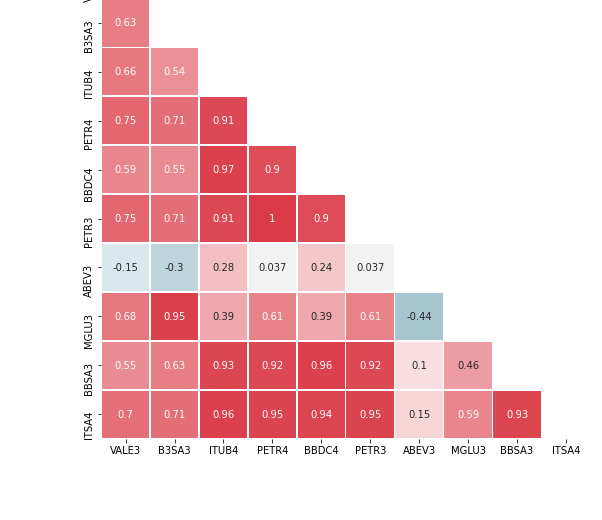

In [95]:
# Create correlation matrix: 

correl = df_main.iloc[:, 1:11].corr()

# Create Mask for upper triangle: 

mask = np.triu(np.ones_like(correl, dtype=np.bool))

# Set Matplotlib Figure: 

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap: 

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask with the correct aspect ratio:

sns.heatmap(correl, mask=mask, cmap=cmap, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, annot=True )

plt.show()

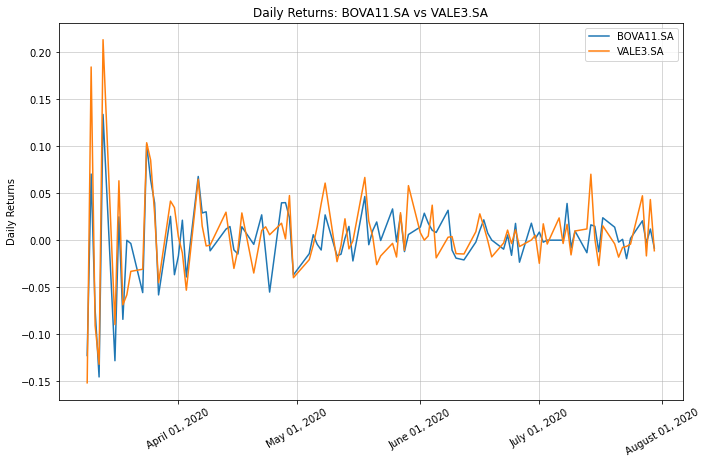

In [96]:
# BOVA11.SA vs VALE3.SA:

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

n_days = 100

plt.plot(df_main.index[-n_days:], df_main.BOVA11_PctChange[-n_days:], label='BOVA11.SA', linestyle='-')
plt.plot(df_main.index[-n_days:], df_main.VALE3_PctChange[-n_days:], label='VALE3.SA', linestyle='-')

plt.title('Daily Returns: BOVA11.SA vs VALE3.SA')
plt.ylabel('Daily Returns')

plt.grid(linewidth=0.5)
plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.legend()
plt.show()

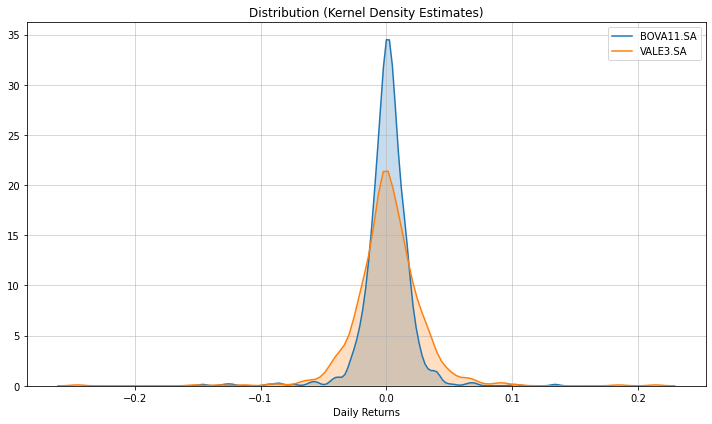

In [97]:
# Distributions:

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_main.BOVA11_PctChange, label='BOVA11.SA' , shade=True, linestyle='-')
sns.kdeplot(data=df_main.VALE3_PctChange, label='VALE3.SA', shade=True, linestyle='-')

plt.title('Distribution (Kernel Density Estimates)')
plt.xlabel('Daily Returns')

plt.grid(linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

- Technical Indicator: Moving Average/Rolling Mean

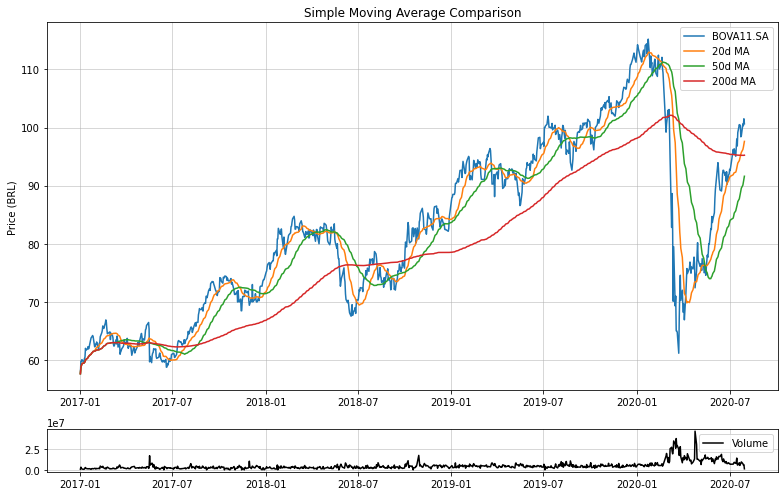

In [123]:
# 20, 50, 200 day Simple Moving Average:

df_adj_close = {}

df_adj_close['20ma'] = bova11['Adj Close'].rolling(window=20,min_periods=0).mean()
df_adj_close['50ma'] = bova11['Adj Close'].rolling(window=50,min_periods=0).mean()
df_adj_close['200ma'] = bova11['Adj Close'].rolling(window=200, min_periods=0).mean()

plt.figure(figsize=(11, 7))

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(bova11.index, bova11['Adj Close'], label='BOVA11.SA', linestyle='-')
ax1.plot(bova11.index, df_adj_close['20ma'], label='20 MA', linestyle='-')
ax1.plot(bova11.index, df_adj_close['50ma'], label='50 MA', linestyle='-')
ax1.plot(bova11.index, df_adj_close['200ma'], label='200 MA', linestyle='-')

ax2.plot(bova11.index, bova11.Volume,color='k', label='Volume', linestyle='-')

ax1.set_ylabel('Price (BRL)')
ax1.set_title('Simple Moving Average Comparison')

ax1.legend()
ax2.legend()

ax1.grid(linewidth=0.5)
ax2.grid(linewidth=0.5)

plt.tight_layout()
plt.show()


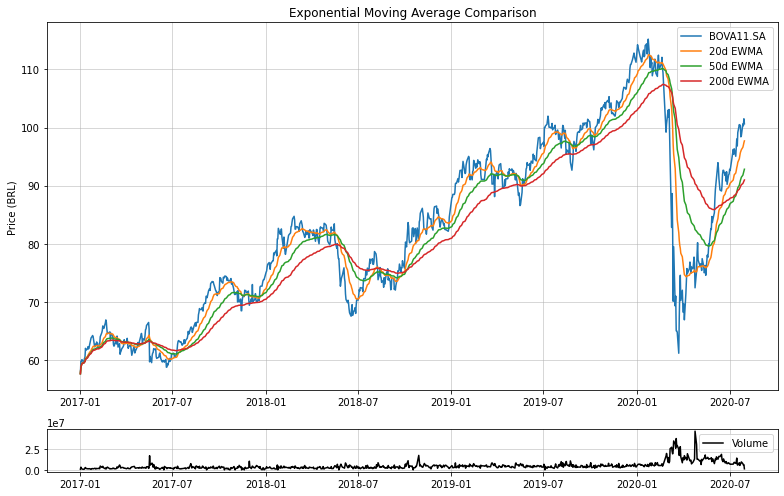

In [125]:
# 20, 50, 200 day Simple Moving Average:

df_adj_close = {}

df_adj_close['20ma'] = bova11['Adj Close'].ewm(span=20,min_periods=0).mean()
df_adj_close['50ma'] = bova11['Adj Close'].ewm(span=50,min_periods=0).mean()
df_adj_close['200ma'] = bova11['Adj Close'].ewm(span=100, min_periods=0).mean()

plt.figure(figsize=(11, 7))

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(bova11.index, bova11['Adj Close'], label='BOVA11.SA', linestyle='-')
ax1.plot(bova11.index, df_adj_close['20ma'], label='20 EWMA', linestyle='-')
ax1.plot(bova11.index, df_adj_close['50ma'], label='50 EWMA', linestyle='-')
ax1.plot(bova11.index, df_adj_close['200ma'], label='200 EWMA', linestyle='-')

ax2.plot(bova11.index, bova11.Volume,color='k', label='Volume', linestyle='-')

ax1.set_ylabel('Price (BRL)')
ax1.set_title('Exponential Moving Average Comparison')

ax1.legend()
ax2.legend()

ax1.grid(linewidth=0.5)
ax2.grid(linewidth=0.5)

plt.tight_layout()
plt.show()

In [99]:
# iShares Ibovespa (BOVA11.SA): Positive Daily Returns: 

pos_mask_main = df_main.BOVA11_PctChange > 0
pos_masked_main_df = df_main[pos_mask_main]

pos_masked_main_df_count = len(pos_masked_main_df)
bova11_count = len(df_main.BOVA11_PctChange[1:])

pos_bova11_prop = pos_masked_main_df_count/bova11_count
print('\n(Daily Returns | BOVA11 > 0): {:.6f} \tCount: {}'.format(pos_bova11_prop, pos_masked_main_df_count))

# iShares Ibovespa (BOVA11.SA): Negative Daily Returns:

neg_mask_main = df_main.BOVA11_PctChange < 0
neg_masked_main_df = df_main[neg_mask_main]

neg_masked_main_df_count = len(neg_masked_main_df)

neg_bova11_prop = neg_masked_main_df_count/bova11_count
print('\n(Daily Returns | BOVA11 < 0): {:.6f} \tCount: {}'.format(neg_bova11_prop, neg_masked_main_df_count))

# iShares Ibovespa (BOVA11.SA): Zero change Daily Returns:

null_mask_main = df_main.BOVA11_PctChange == 0
null_masked_main_df = df_main[null_mask_main]

null_masked_main_df_count = len(null_masked_main_df)

null_bova11_prop = null_masked_main_df_count/bova11_count
print('\n(Daily Returns | BOVA11 = 0): {:.6f} \tCount: {}'.format(null_bova11_prop, null_masked_main_df_count))


(Daily Returns | BOVA11 > 0): 0.533109 	Count: 475

(Daily Returns | BOVA11 < 0): 0.444444 	Count: 396

(Daily Returns | BOVA11 = 0): 0.022447 	Count: 20


In [100]:
# Calculating Proportion of Positive Daily Returns for all assets | BOVA11 > 0

pct_columns = df_main.columns[-10:].tolist()
ticker_columns = df_main.columns[1:11].tolist()

list_c = []

for col in pct_columns:
    mask = (df_main[col] > df_main.BOVA11_PctChange) & (df_main.BOVA11_PctChange > 0)
    masked_df = df_main[mask]
    masked_df_count = len(masked_df)
    list_c.append(masked_df_count)

array_c = np.array(list_c)
array_c = array_c / pos_masked_main_df_count
list_c = array_c.tolist()

my_dict_A = dict(zip(ticker_columns, list_c))
my_dict_A = {k: v for k, v in sorted(my_dict_A.items(), key=lambda item: item[1], reverse=True)}

# Calculating Proportion of Negative Daily Returns for all assets | BOVA11 < 0

list_d = []

for col in pct_columns:
    mask = (df_main[col] > df_main.BOVA11_PctChange) & (df_main.BOVA11_PctChange < 0)
    masked_df = df_main[mask]
    masked_df_count = len(masked_df)
    list_d.append(masked_df_count)

array_d = np.array(list_d)
array_d = array_d / neg_masked_main_df_count
list_d = array_d.tolist()

my_dict_B = dict(zip(ticker_columns, list_d))
my_dict_B = {k: v for k, v in sorted(my_dict_B.items(), key=lambda item: item[1], reverse=True)}    

In [101]:
print('\nRanking of stocks given POSITIVE benchmark returns:')
i = 0
for k, v in my_dict_A.items():
    i += 1
    print('\n{}. {}: {:.4f}'.format(i, k, v))


Ranking of stocks given POSITIVE benchmark returns:

1. PETR4: 0.5832

2. PETR3: 0.5832

3. BBDC4: 0.5811

4. B3SA3: 0.5642

5. BBSA3: 0.5432

6. MGLU3: 0.5221

7. ITSA4: 0.5221

8. ITUB4: 0.5011

9. VALE3: 0.4779

10. ABEV3: 0.3242


In [102]:
# Calculating Proportion of Negative Daily Returns for all assets | BOVA11 > 0:

print('\nRanking of stocks given NEGATIVE benchmark returns:')

i = 0
for k, v in my_dict_B.items():
    i += 1
    print('\n{}. {}: {:.4f}'.format(i, k, v))


Ranking of stocks given NEGATIVE benchmark returns:

1. ABEV3: 0.6111

2. MGLU3: 0.5455

3. VALE3: 0.5202

4. B3SA3: 0.4949

5. ITSA4: 0.4823

6. ITUB4: 0.4596

7. PETR4: 0.4167

8. PETR3: 0.4167

9. BBDC4: 0.3990

10. BBSA3: 0.3737


In [103]:
# 

csv_path = ('/Users/antonioelias/Desktop/Rafter Investimentos/Python Presentation/BOVA11_holdings.csv')
blackrock_full = pd.read_csv(csv_path, decimal=',')
blackrock_full = blackrock_full.iloc[:-1, :]
blackrock_full.head()

,C√≥digo,Nome,Peso (%),Pre√ßo,Cotas,Valor de mercado,Valor de face,Setor,SEDOL,C√≥digo ISIN,Bolsa,Localiza√ß√£o,Moeda,Taxa de c√¢mbio
0,VALE3,CIA VALE DO RIO DOCE SH,10.49,"61,37",22.485.500,1.379.935.135,"1.379.935.135,00",Materiais,2196286,BRVALEACNOR0,XBSP,Brasil,BRL,1.0
1,B3SA3,B3 BRASIL BOLSA BALCAO SA,7.04,"66,23",13.973.200,925.445.036,"925.445.036,00",Produtos financeiros,BG36ZK1,BRB3SAACNOR6,XBSP,Brasil,BRL,1.0
2,ITUB4,ITAU UNIBANCO HOLDING PREF SA,6.84,"27,80",32.362.800,899.685.840,"899.685.840,00",Produtos financeiros,B037HR3,BRITUBACNPR1,XBSP,Brasil,BRL,1.0
3,PETR4,PETROLEO BRASILEIRO PREF SA,5.45,"23,20",30.874.000,716.276.800,"716.276.800,00",Energia,2684532,BRPETRACNPR6,XBSP,Brasil,BRL,1.0
4,BBDC4,BANCO BRADESCO PREF SA,5.24,"23,68",29.108.700,689.294.016,"689.294.016,00",Produtos financeiros,B00FM53,BRBBDCACNPR8,XBSP,Brasil,BRL,1.0


In [104]:
blackrock_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   C√≥digo           80 non-null     object 
 1   Nome              80 non-null     object 
 2   Peso (%)          80 non-null     float64
 3   Pre√ßo            80 non-null     object 
 4   Cotas             80 non-null     object 
 5   Valor de mercado  80 non-null     object 
 6   Valor de face     80 non-null     object 
 7   Setor             80 non-null     object 
 8   SEDOL             80 non-null     object 
 9   C√≥digo ISIN      80 non-null     object 
 10  Bolsa             80 non-null     object 
 11  Localiza√ß√£o     80 non-null     object 
 12  Moeda             80 non-null     object 
 13  Taxa de c√¢mbio   80 non-null     float64
dtypes: float64(2), object(12)
memory usage: 8.9+ KB


In [105]:
# Renaming columns:

column_names = ['Ticker_BR', 'Nome', 'Peso' , 'Preço', 
                'Cotas', 'Valor_de_Mercado', 'Valor_de_face', 
                'Setor', 'SEDOL', 'Codigo_ISIN', 'Bolsa', 
                'Localizaçao', 'Moeda', 'Taxa_de_cambio']

blackrock_full.columns = column_names

# Selecting relevant columns: 

filtered_columns = [ 'Ticker_BR', 'Nome', 'Peso', 'Valor_de_Mercado', 'Setor']
ishares_bova11 = blackrock_full.loc[:, filtered_columns]

# Column correction: 

# (1) Setor:

dict_correction = { 'Consumo discricion√°rio': 'Consumo discricionário', 
                    'Cuidados de sa√∫de': 'Cuidados de saúde',
                    'Servi√ßos p√∫blicos': 'Serviços públicos',
                    'Tecnologia de informa√ß√£o': 'Tecnologia de informação',
                    'Imobili√°rio': 'Imobiliário' }

for k, v in dict_correction.items():
    ishares_bova11['Setor'] = ishares_bova11['Setor'].replace(k, v)

# (2) Valor de mercado:

ishares_bova11['Valor_de_Mercado'] = ishares_bova11['Valor_de_Mercado'].astype(str)
ishares_bova11['Valor_de_Mercado'] = [x.replace('.', '') for x in ishares_bova11['Valor_de_Mercado']]
ishares_bova11['Valor_de_Mercado'] = ishares_bova11['Valor_de_Mercado'].astype(float)

In [106]:
# Inspecting DataFrame

ishares_bova11.head(10)

,Ticker_BR,Nome,Peso,Valor_de_Mercado,Setor
0,VALE3,CIA VALE DO RIO DOCE SH,10.49,1.379935e+09,Materiais
1,B3SA3,B3 BRASIL BOLSA BALCAO SA,7.04,9.254450e+08,Produtos financeiros
2,ITUB4,ITAU UNIBANCO HOLDING PREF SA,6.84,8.996858e+08,Produtos financeiros
3,PETR4,PETROLEO BRASILEIRO PREF SA,5.45,7.162768e+08,Energia
4,BBDC4,BANCO BRADESCO PREF SA,5.24,6.892940e+08,Produtos financeiros
5,PETR3,PETROBRAS,3.64,4.789251e+08,Energia
6,ABEV3,AMBEV SA,3.45,4.543936e+08,Bens de primeira necessidade
7,MGLU3,MAGAZINE LUIZA SA,2.73,3.586144e+08,Consumo discricionário
8,ITSA4,ITAUSA INVESTIMENTOS ITAU PREF SA,2.57,3.382490e+08,Produtos financeiros
9,BBAS3,BANCO DO BRASIL SA,2.57,3.382220e+08,Produtos financeiros


In [107]:
# Inspecting Setor:

# Valor de Mercado / Setor
list_setor = ishares_bova11.Setor.value_counts().index.tolist()

def vm_i(setor_i):
    mask = ishares_bova11.Setor == (setor_i)
    df = ishares_bova11[mask]
    vm = df.Valor_de_Mercado.sum()
    return vm

list_vm = []

for i in list(range(0, len(list_setor))):
    valor_m = vm_i(list_setor[i])
    list_vm.append(valor_m)

setor_info = ishares_bova11.Setor.value_counts()
setor_info = setor_info.reset_index()
setor_setor = setor_info['index'].tolist()
setor_count = setor_info.Setor.tolist()

dict_setor_info = { 'Setor': setor_setor,
                    'Count': setor_count, 
                    'Valor_de_Mercado': list_vm}

df_setor_info = pd.DataFrame(dict_setor_info)
df_setor_info = df_setor_info.sort_values('Valor_de_Mercado', ascending=False)
df_setor_info = df_setor_info.reset_index()
df_setor_info = df_setor_info.iloc[:, 1:4]

df_setor_info

,Setor,Count,Valor_de_Mercado
0,Produtos financeiros,12,3.868881e+09
1,Materiais,9,2.034100e+09
2,Consumo discricionário,14,1.528861e+09
3,Energia,4,1.426034e+09
4,Bens de primeira necessidade,9,1.388500e+09
5,Bens Industriais,8,9.072893e+08
6,Serviços públicos,10,8.364215e+08
7,Cuidados de saúde,5,5.114885e+08
8,Communication,2,2.212724e+08
9,Cash and/or Derivatives,2,1.992508e+08


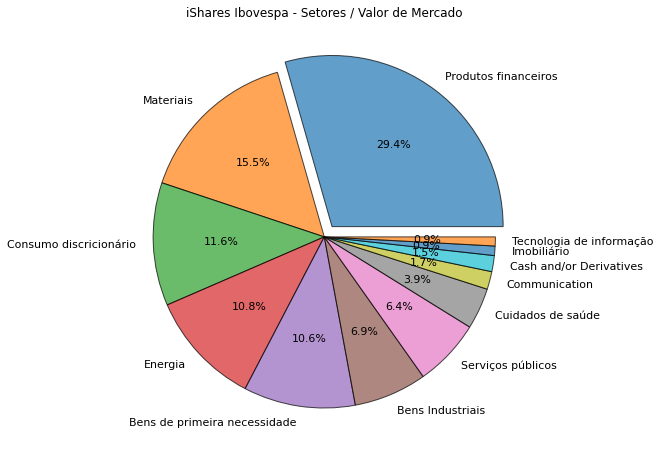

In [108]:
# Setor Pie Chart

# ADD WEIGHTS FOR EACH SECTOR

list_setor_keys = df_setor_info.Setor.tolist()
list_setor_vals = df_setor_info['Valor_de_Mercado'].tolist()

my_dict_setor = {}

for i, j in enumerate(list_setor_vals):
    key = list_setor_keys[i]
    my_dict_setor[key] = j

plt.figure(figsize=(9, 9))

array_zeros = np.zeros(len(list_setor_keys)-1).tolist()
array_ones = np.ones(len(list_setor_keys)-1)
expl = [0.075] + array_zeros

alpha=0.7
which_wedge = 4
n = plt.pie(my_dict_setor.values(), labels=my_dict_setor.keys(), shadow=False,
        autopct='%1.1f%%',explode=expl, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 11})

j = list(range(0, len(list_setor_keys)))

for i in j:
    n[0][i].set_alpha(alpha)

plt.tight_layout()
plt.title('iShares Ibovespa - Setores / Valor de Mercado')
plt.show()

In [109]:
# Creating yahoo tickers: 

tickers_br=ishares_bova11.Ticker_BR.tolist()
tickers_yahoo = []

for i in list(range(0, len(tickers_br))):
    ticker = tickers_br[i] + '.SA'
    tickers_yahoo.append(ticker)

bova11_yahoo = ['BOVA11.SA']
tickers_yahoo = bova11_yahoo + tickers_yahoo

In [110]:
# Downloading data:

df_main_INDEX = yf.download(tickers_yahoo, start=start_i, parse_dates=True)

[*********************100%***********************]  81 of 81 completed

2 Failed downloads:
- XBQ0.SA: No data found, symbol may be delisted
- BRL.SA: No data found, symbol may be delisted


In [111]:
# Removing problematic columns: 

problematic_cols = ['BRL.SA', 'BTOW1.SA', 'CRFB3.SA', 'CVCB1.SA', 'GNDI3.SA', 'HAPV3.SA', 'HGTX3.SA', 'IRBR1.SA', 'NTCO3.SA', 'PCAR3.SA', 'SUZB3.SA', 'XBQ0.SA', 'BRDT3.SA']

df_main_INDEX = df_main_INDEX.drop(problematic_cols, axis=1, level=1)

In [112]:
# Creating Adjusted Close DataFrame:

df_adj_close = df_main_INDEX['Adj Close']
df_adj_close = df_adj_close.iloc[:500, :]
df_adj_close.tail()

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BOVA11.SA,BPAC11.SA,...,TAEE11.SA,TIMP3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-21,14.781768,35.000000,25.496578,40.811485,25.691530,28.646662,23.419441,4.88697,82.440002,21.910959,...,21.829603,11.543520,26.800989,23.886221,8.972420,49.547092,40.916927,4.56,16.903507,22.037134
2018-12-26,14.752536,34.889999,25.032375,41.079922,25.552656,28.301643,23.332380,4.82798,82.139999,22.376343,...,21.736235,11.505296,27.138527,24.170351,8.913967,49.137932,40.873394,4.30,16.621349,21.680607
2018-12-27,14.713560,34.910000,25.138079,41.764900,26.197727,28.958889,23.671919,4.80831,82.650002,22.281368,...,21.764242,11.123060,26.721529,24.825296,8.767837,48.222198,39.680717,4.32,16.748455,22.393658
2018-12-28,14.986394,36.000000,25.762688,43.033028,26.630396,29.886816,24.020164,4.90664,84.599998,22.366844,...,22.035013,11.323734,26.949869,25.619898,8.982162,49.683475,40.246578,4.39,17.149321,22.894722
2019-01-02,15.736688,36.330002,26.704405,44.986126,28.140892,31.232300,24.655710,4.99514,87.900002,23.649021,...,22.604561,11.610410,28.466816,26.168896,9.508233,49.771152,41.073627,4.38,17.579521,23.945028


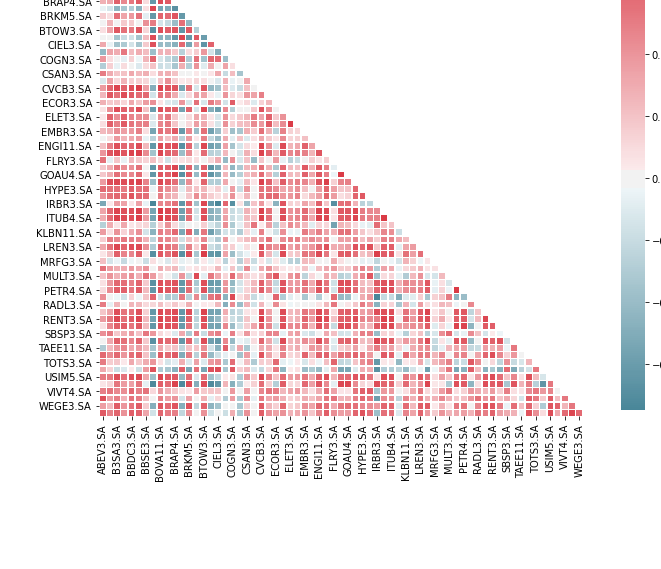

In [113]:
# Full Correlation Matrix: 

correl = df_adj_close.corr()
mask = np.triu(np.ones_like(correl, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 11))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correl, mask=mask, cmap=cmap, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.show()

- Dimensionality reduction:
- (1) - Very weak correlation: [-0.2, 0.2]
- (2) - Weak correlation:      (0.2, 0.4] U [-0.4, -0.2)
- (3) - Medium correlation:    (0.4, 0.6] U [-0.6, -0.4)
- (4) - Strong correlation:      (0.6, 0.8] U [-0.8, -0.6)
- (5) - Very strong correlation: (0.8, 1] U [-1, -0.8)

In [114]:
# Dimensionality reduction : Part 1

def correl_ranking(lower, upper, ticker_i):
    mask = (correl[ticker_i] >= lower) & (correl[ticker_i] <= float(upper))
    df_i = correl[mask]
    df_i = df_i.loc[:, ticker_i]
    df_i = df_i.sort_values(ascending=False)

    keys_i = df_i.index.tolist()
    vals_i = df_i.values.tolist()
    my_dict_i = dict(zip(keys_i, vals_i))
    return my_dict_i, df_i


In [115]:
bova11_ranking = correl_ranking(-0.2, 0.2, 'BOVA11.SA')
print(bova11_ranking[1])

JBSS3.SA    0.199800
MULT3.SA    0.164253
SBSP3.SA    0.136008
FLRY3.SA    0.135305
TOTS3.SA    0.086901
ECOR3.SA    0.074848
MRFG3.SA    0.004845
COGN3.SA   -0.165550
BRML3.SA   -0.167419
QUAL3.SA   -0.194755
Name: BOVA11.SA, dtype: float64


In [116]:
# Method: 
# Add corresponding columns and establish threshold